In [2]:
#Current as of: 2022-07-29.
#Objective is to get national vital statistics data from the CDC website, specifically births and deaths by US states and territories.
#Currently available data summary is for 2020 only, and that is what the link below will pull. This is the most complete data, not most current.
#This page will in its complete form will probably report the most complete numbers to date, so if you check in subsequent years, it should still work.
#If you want, the most current vital statistics data can be requested from each state.
#In this case, the data is tabular, so we will try to use pandas to directly read in the table, instead of going through beautifulsoup.
# Fertility Rate = Number of births per 1000 women between 15-44 years of age.
# Crude Birth Rate = Number of births per 1000 individuals of a population. i.e. (number of births * 1000)/ population.
# Death Rate = Number of deaths per 100,000 individuals. i.e. (number of deaths * 100000)/ population.
#useful links:
#1) https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=9CC7C52E44642DAFCE5BCA2CBAC9
#2) https://www.cdc.gov/publichealthgateway/healthdirectories/healthdepartments.html
#citation1: Centers for Disease Control and Prevention, National Center for Health Statistics. National Vital Statistics System, Mortality 1999-2020 on CDC WONDER Online Database, released in 2021. Data are from the Multiple Cause of Death Files, 1999-2020, as compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. Accessed at http://wonder.cdc.gov/ucd-icd10.html on Jul 29, 2022 8:19:19 PM

In [3]:
#we will only need pandas and html5lib libraries.
import pandas as pd
import html5lib

url="https://www.cdc.gov/nchs/fastats/state-and-territorial-data.htm"

In [4]:
#read_html() produces a list of dataframes (there could be multiple tables in an HTML source), get the desired one by index. In our case, there is a single dataframe:
pdtable = pd.read_html(url)
pdtable

[                                      State/Territory  \
 0                                             Alabama   
 1                                              Alaska   
 2                                             Arizona   
 3                                            Arkansas   
 4                                          California   
 5                                            Colorado   
 6                                         Connecticut   
 7                                            Delaware   
 8                                District of Columbia   
 9                                             Florida   
 10                                            Georgia   
 11                                             Hawaii   
 12                                              Idaho   
 13                                           Illinois   
 14                                            Indiana   
 15                                               Iowa   
 16           

In [5]:
# How many tables do we have in our list of dataframes?
print(f'Total tables: {len(pdtable)}')

Total tables: 1


In [6]:
#read_html() produces a list of dataframes (there could be multiple tables in an HTML source), get the desired one by index. In our case, there is a single dataframe:
#since we only have one table in our list of dataframes, lets read it.
#the table looks good, just need to do some cleanup.
birthsdeaths = pdtable[0]
birthsdeaths

,State/Territory,Births,Fertility Rate,Deaths,Death Rate
0,Alabama,57647,60.6,64779,1316.2
1,Alaska,9469,65.7,5170,707.1
2,Arizona,76947,54.0,75747,1020.7
3,Arkansas,35251,60.7,38108,1257.5
4,California,420259,52.4,319808,812.4
5,Colorado,61494,51.5,46918,807.9
6,Connecticut,33460,49.9,37853,1064.2
7,Delaware,10392,57.0,11072,1122.0
8,District of Columbia,8874,46.1,6198,869.5
9,Florida,209671,53.4,239685,1102.8


In [7]:
#before we go into the cleanup...
#another quick way to scrape a table using pandas.
import pandas as pd
import html5lib
#pdtable = pd.read_html(url) #we have already done this earlier, so we will skip this.
birthsdeaths = pd.concat(pdtable)
birthsdeaths



,State/Territory,Births,Fertility Rate,Deaths,Death Rate
0,Alabama,57647,60.6,64779,1316.2
1,Alaska,9469,65.7,5170,707.1
2,Arizona,76947,54.0,75747,1020.7
3,Arkansas,35251,60.7,38108,1257.5
4,California,420259,52.4,319808,812.4
5,Colorado,61494,51.5,46918,807.9
6,Connecticut,33460,49.9,37853,1064.2
7,Delaware,10392,57.0,11072,1122.0
8,District of Columbia,8874,46.1,6198,869.5
9,Florida,209671,53.4,239685,1102.8


In [8]:
#cleanup to remove unnecessary information. Last two rows (rows 56 and 57) contain no data, and can be dropped.
birthsdeaths.drop([56, 57], inplace=True)

In [9]:
#check cleanup.
#This is the basic dataset that we pulled from the website. We can stop here, or do a number of analyses just on this data.
#This dataset can also be combined with other studies for various kinds of analyses.
birthsdeaths

,State/Territory,Births,Fertility Rate,Deaths,Death Rate
0,Alabama,57647,60.6,64779,1316.2
1,Alaska,9469,65.7,5170,707.1
2,Arizona,76947,54.0,75747,1020.7
3,Arkansas,35251,60.7,38108,1257.5
4,California,420259,52.4,319808,812.4
5,Colorado,61494,51.5,46918,807.9
6,Connecticut,33460,49.9,37853,1064.2
7,Delaware,10392,57.0,11072,1122.0
8,District of Columbia,8874,46.1,6198,869.5
9,Florida,209671,53.4,239685,1102.8


In [10]:
#find out the data tyes of the dataframe
birthsdeaths.dtypes

State/Territory    object
Births             object
Fertility Rate     object
Deaths             object
Death Rate         object
dtype: object

In [11]:
# we want to change some of the column types to numeric, for doing data analysis. 
# Before doing that, we need to get rid of all the dashes and replace them with NaN values. We will use numpy for this.
import numpy as np
birthsdeaths.replace('—', np.NaN, inplace=True)

In [12]:
#check if dashes were replaced by NaN.
birthsdeaths

,State/Territory,Births,Fertility Rate,Deaths,Death Rate
0,Alabama,57647,60.6,64779,1316.2
1,Alaska,9469,65.7,5170,707.1
2,Arizona,76947,54.0,75747,1020.7
3,Arkansas,35251,60.7,38108,1257.5
4,California,420259,52.4,319808,812.4
5,Colorado,61494,51.5,46918,807.9
6,Connecticut,33460,49.9,37853,1064.2
7,Delaware,10392,57.0,11072,1122.0
8,District of Columbia,8874,46.1,6198,869.5
9,Florida,209671,53.4,239685,1102.8


In [13]:
#all dashes were successfully replaced by NaN.
#convert these specific columns to numeric type.
birthsdeaths[['Births', 'Fertility Rate', 'Deaths', 'Death Rate']] = birthsdeaths[['Births', 'Fertility Rate', 'Deaths', 'Death Rate']].apply(pd.to_numeric)

In [14]:
#check if conversion worked.
birthsdeaths.dtypes

State/Territory     object
Births             float64
Fertility Rate     float64
Deaths             float64
Death Rate         float64
dtype: object

In [15]:
#basic summary statistics using pandas describe() function
birthsdeaths.describe()

,Births,Fertility Rate,Deaths,Death Rate
count,55.000000,55.000000,51.000000,51.000000
mean,66127.618182,56.778182,66347.627451,1059.888235
std,80355.823952,7.956123,67653.163025,161.428768
min,628.000000,31.200000,5170.000000,661.500000
25%,13788.000000,53.900000,17975.500000,969.000000
50%,45702.000000,56.200000,47809.000000,1064.200000
75%,78652.500000,60.750000,79395.000000,1169.550000
max,420259.000000,89.600000,319808.000000,1462.700000


In [16]:
#which state/territory has the maximum births?
birthsdeaths.loc[birthsdeaths['Births'].idxmax()]

State/Territory    California
Births               420259.0
Fertility Rate           52.4
Deaths               319808.0
Death Rate              812.4
Name: 4, dtype: object

In [17]:
#which state/territory has the highest fertility rate?
birthsdeaths.loc[birthsdeaths['Fertility Rate'].idxmax()]

State/Territory      Guam
Births             2935.0
Fertility Rate       89.6
Deaths                NaN
Death Rate            NaN
Name: 53, dtype: object

In [18]:
#which state/territory has the maximum deaths?
birthsdeaths.loc[birthsdeaths['Deaths'].idxmax()]

State/Territory    California
Births               420259.0
Fertility Rate           52.4
Deaths               319808.0
Death Rate              812.4
Name: 4, dtype: object

In [19]:
#Which state/territory has the highest death rate?
birthsdeaths.loc[birthsdeaths['Death Rate'].idxmax()]

State/Territory    West Virginia
Births                   17323.0
Fertility Rate              55.3
Deaths                   26106.0
Death Rate                1462.7
Name: 48, dtype: object

In [20]:
#which state has the minimum deaths?
birthsdeaths.loc[birthsdeaths['Deaths'].idxmin()]

State/Territory    Alaska
Births             9469.0
Fertility Rate       65.7
Deaths             5170.0
Death Rate          707.1
Name: 1, dtype: object

In [21]:
#maximum everything
print(birthsdeaths.max())
# we get some weird results because of the index row.

State/Territory     Wyoming
Births             420259.0
Fertility Rate         89.6
Deaths             319808.0
Death Rate           1462.7
dtype: object


In [22]:
#we will move the state/ territory names to index, so to get better results.
#move state names to index - test
birthsdeaths.set_index('State/Territory')

,Births,Fertility Rate,Deaths,Death Rate
State/Territory,,,,
Alabama,57647.0,60.6,64779.0,1316.2
Alaska,9469.0,65.7,5170.0,707.1
Arizona,76947.0,54.0,75747.0,1020.7
Arkansas,35251.0,60.7,38108.0,1257.5
California,420259.0,52.4,319808.0,812.4
Colorado,61494.0,51.5,46918.0,807.9
Connecticut,33460.0,49.9,37853.0,1064.2
Delaware,10392.0,57.0,11072.0,1122.0
District of Columbia,8874.0,46.1,6198.0,869.5


In [23]:
#move state names to index - test worked, now write to dataframe.
birthsdeaths = birthsdeaths.set_index('State/Territory')
birthsdeaths

,Births,Fertility Rate,Deaths,Death Rate
State/Territory,,,,
Alabama,57647.0,60.6,64779.0,1316.2
Alaska,9469.0,65.7,5170.0,707.1
Arizona,76947.0,54.0,75747.0,1020.7
Arkansas,35251.0,60.7,38108.0,1257.5
California,420259.0,52.4,319808.0,812.4
Colorado,61494.0,51.5,46918.0,807.9
Connecticut,33460.0,49.9,37853.0,1064.2
Delaware,10392.0,57.0,11072.0,1122.0
District of Columbia,8874.0,46.1,6198.0,869.5


In [24]:
#Now we can ask some interesting questions, and get answers for them. Repeat of above, but with better formatting because of moving the State/Territory column to index.
#which state/territory has the most births?
print(birthsdeaths[birthsdeaths['Births'] == birthsdeaths['Births'].max()])

                   Births  Fertility Rate    Deaths  Death Rate
State/Territory                                                
California       420259.0            52.4  319808.0       812.4


In [25]:
#which state/territory has the highest fertility rate?
print(birthsdeaths[birthsdeaths['Fertility Rate'] == birthsdeaths['Fertility Rate'].max()])

                 Births  Fertility Rate  Deaths  Death Rate
State/Territory                                            
Guam             2935.0            89.6     NaN         NaN


In [26]:
#which state/territory has the lowest fertility rate?
print(birthsdeaths[birthsdeaths['Fertility Rate'] == birthsdeaths['Fertility Rate'].min()])

                  Births  Fertility Rate  Deaths  Death Rate
State/Territory                                             
Puerto Rico      18933.0            31.2     NaN         NaN


In [27]:
#which state/territory has the most deaths?
print(birthsdeaths[birthsdeaths['Deaths'] == birthsdeaths['Deaths'].max()])

                   Births  Fertility Rate    Deaths  Death Rate
State/Territory                                                
California       420259.0            52.4  319808.0       812.4


In [28]:
#which state/territory has the least deaths?
print(birthsdeaths[birthsdeaths['Deaths'] == birthsdeaths['Deaths'].min()])

                 Births  Fertility Rate  Deaths  Death Rate
State/Territory                                            
Alaska           9469.0            65.7  5170.0       707.1


In [26]:
#which state/territory has the highest death rate?
print(birthsdeaths[birthsdeaths['Death Rate'] == birthsdeaths['Death Rate'].max()])


                  Births  Fertility Rate   Deaths  Death Rate
State/Territory                                              
West Virginia    17323.0            55.3  26106.0      1462.7


In [27]:
#which state/territory has the lowest death rate?
print(birthsdeaths[birthsdeaths['Death Rate'] == birthsdeaths['Death Rate'].min()])

                  Births  Fertility Rate   Deaths  Death Rate
State/Territory                                              
Utah             45702.0            64.1  21497.0       661.5


In [28]:
#sort dataframe by descending value of Births
birthsdeaths.sort_values(by=['Births'], ascending = [False])

,Births,Fertility Rate,Deaths,Death Rate
State/Territory,,,,
California,420259.0,52.4,319808.0,812.4
Texas,368190.0,60.2,250339.0,852.6
Florida,209671.0,53.4,239685.0,1102.8
New York,209338.0,54.6,203341.0,1051.6
Illinois,133298.0,53.8,132663.0,1053.9
Pennsylvania,130693.0,54.9,155546.0,1216.8
Ohio,129191.0,58.3,143700.0,1228.9
Georgia,122473.0,55.7,103075.0,962.4
North Carolina,116730.0,56.2,109449.0,1032.5


In [29]:
#sort dataframe by descending value of Births and write to dataframe (inplace=True)
birthsdeaths.sort_values(by=['Births'], ascending = [False], inplace=True)
birthsdeaths

,Births,Fertility Rate,Deaths,Death Rate
State/Territory,,,,
California,420259.0,52.4,319808.0,812.4
Texas,368190.0,60.2,250339.0,852.6
Florida,209671.0,53.4,239685.0,1102.8
New York,209338.0,54.6,203341.0,1051.6
Illinois,133298.0,53.8,132663.0,1053.9
Pennsylvania,130693.0,54.9,155546.0,1216.8
Ohio,129191.0,58.3,143700.0,1228.9
Georgia,122473.0,55.7,103075.0,962.4
North Carolina,116730.0,56.2,109449.0,1032.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


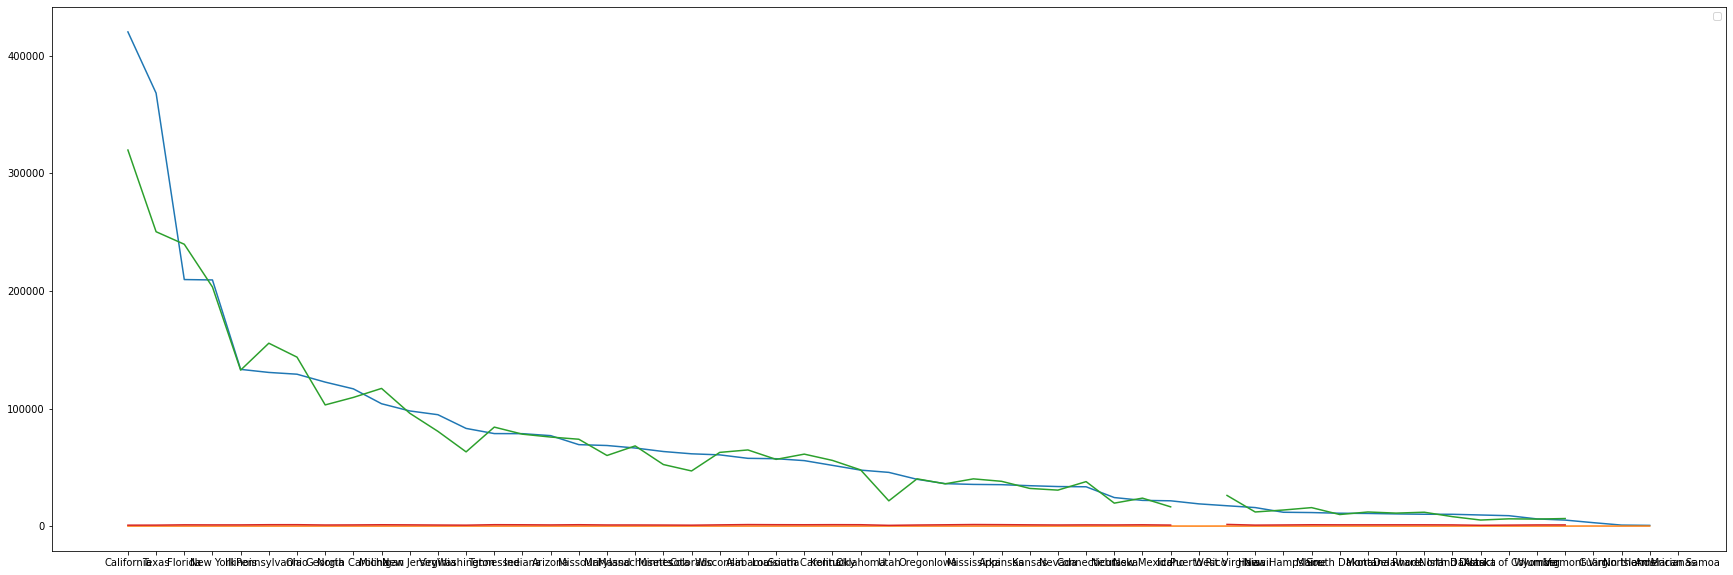

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(birthsdeaths[['Births', 'Fertility Rate', 'Deaths', 'Death Rate']])
plt.legend()
#didn't work out so great.

<AxesSubplot:xlabel='State/Territory'>

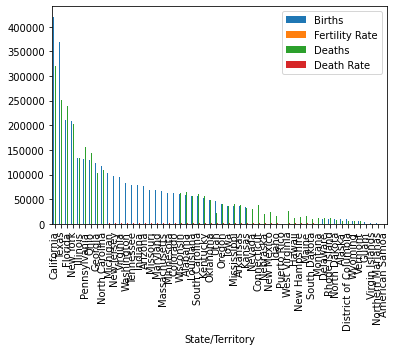

In [31]:
#simplest way to make a bar plot df.plot(kind="bar")
birthsdeaths.plot(kind="bar")

<AxesSubplot:xlabel='State/Territory'>

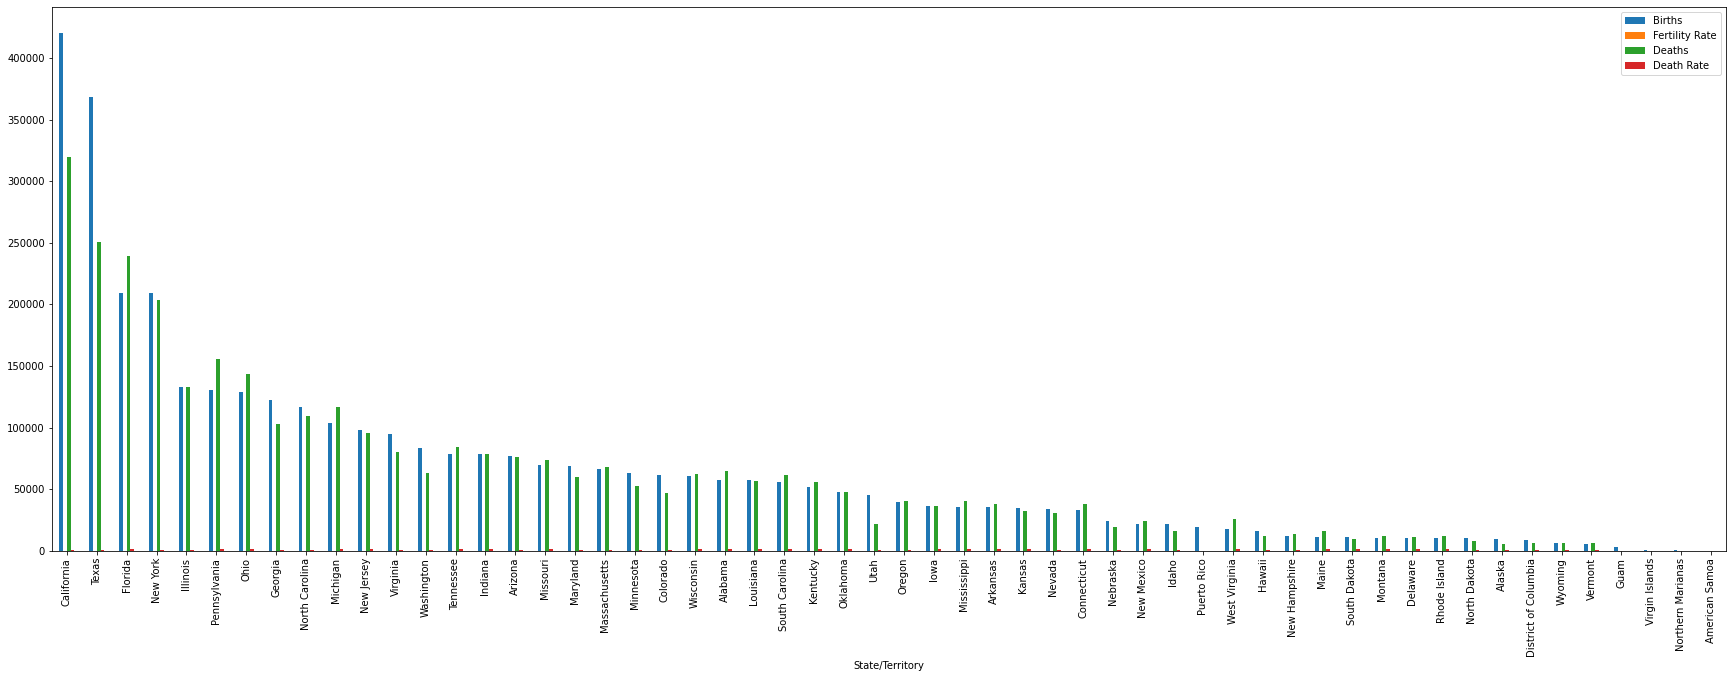

In [32]:
plt.rcParams["figure.figsize"] = [30, 10] #adjust the size of the plot
birthsdeaths.plot(kind="bar")

<AxesSubplot:xlabel='State/Territory'>

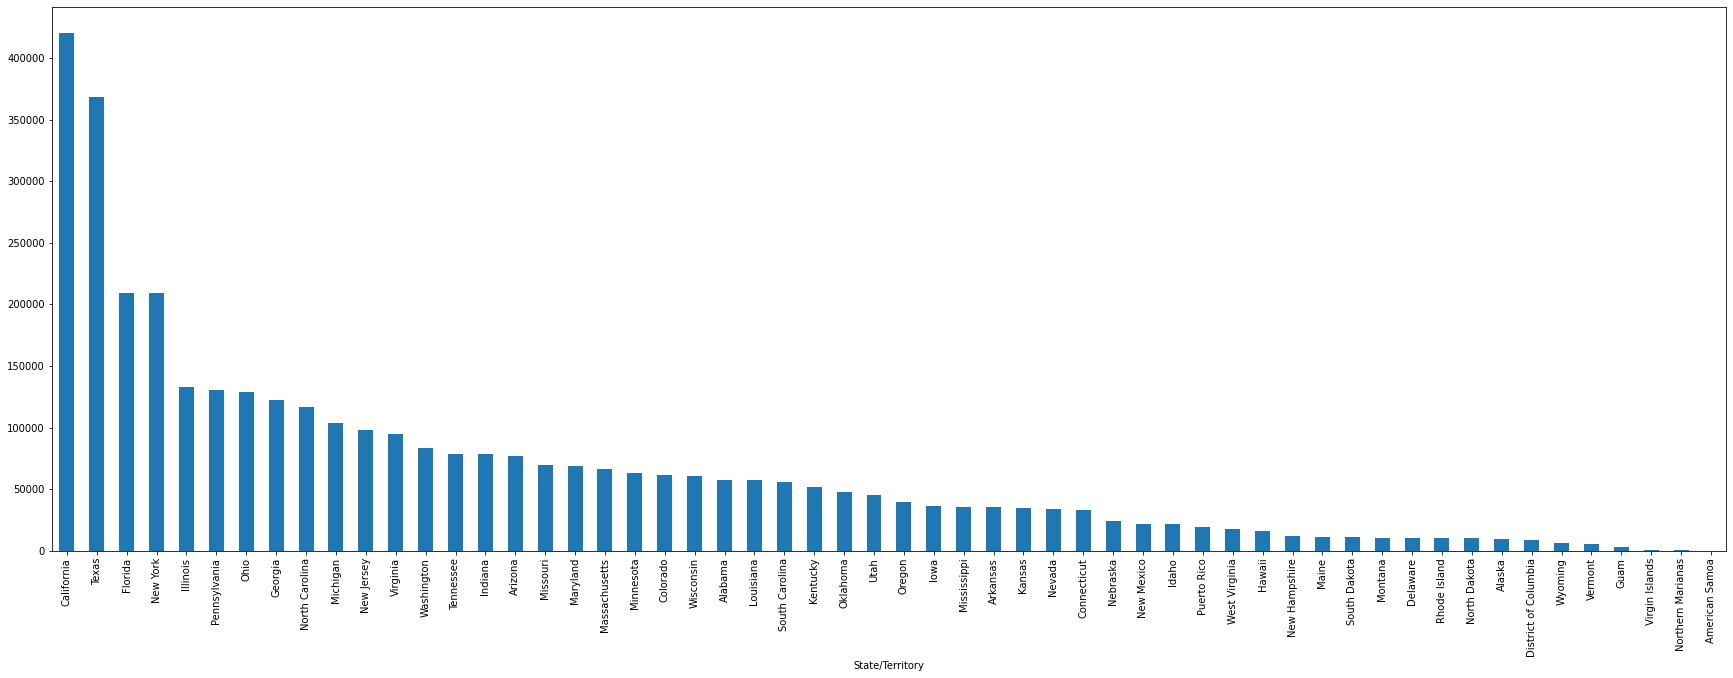

In [33]:
plt.figure(figsize=(30,10)) #adjust the size of the plot
birthsdeaths['Births'].plot(kind="bar")

Text(0.5, 0, 'State/Territory')

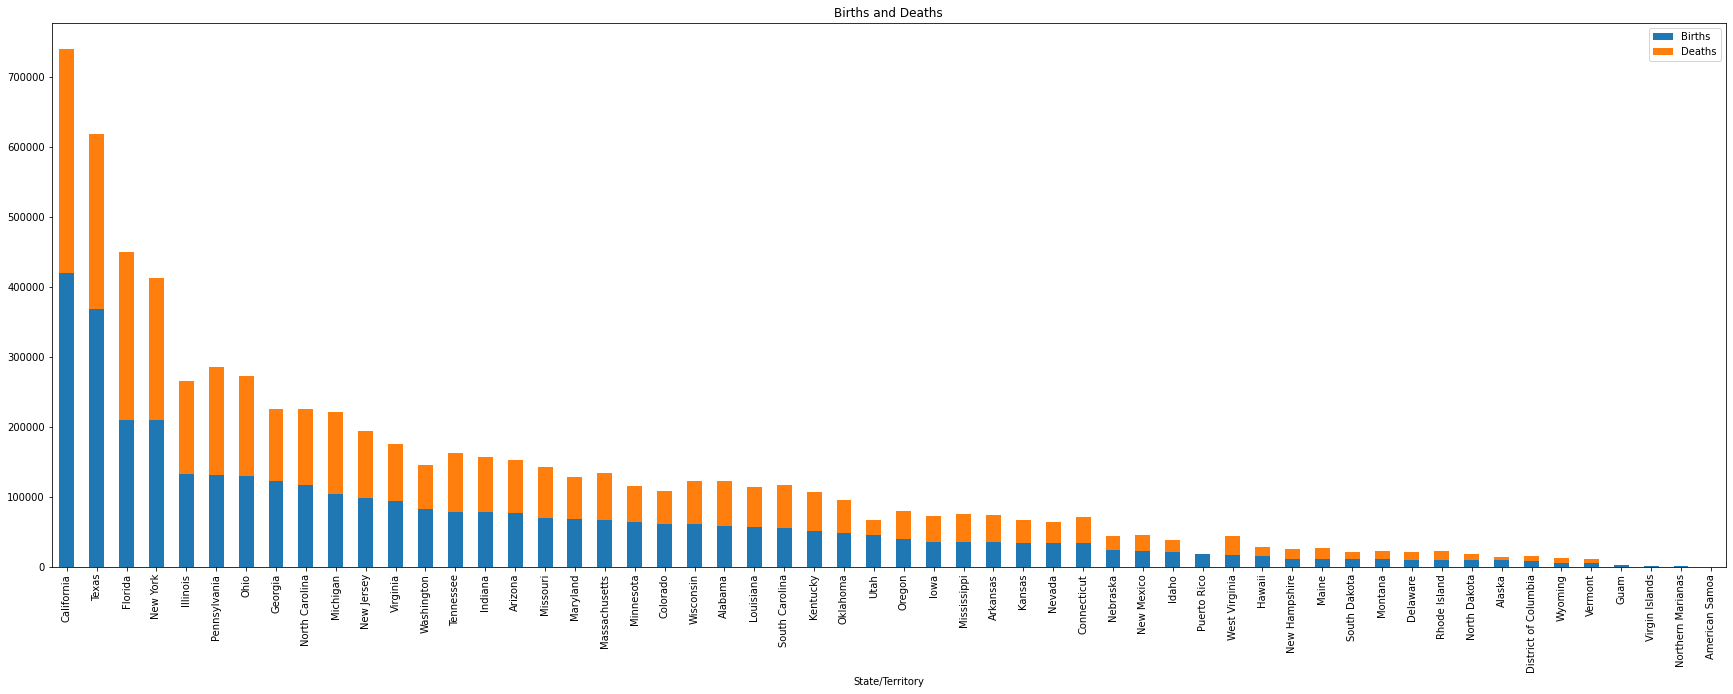

In [34]:
# Choose columns in the order to "stack" them
birthsdeaths[["Births", "Deaths"]].plot(kind="bar", stacked=True)
plt.title("Births and Deaths")
plt.xlabel("State/Territory")
#plt.ylabel("No.")

In [52]:
#Which states have more births than deaths?
print(birthsdeaths[birthsdeaths['Births'] > birthsdeaths['Deaths']])

                        Births  Fertility Rate    Deaths  Death Rate
State/Territory                                                     
California            420259.0            52.4  319808.0       812.4
Texas                 368190.0            60.2  250339.0       852.6
New York              209338.0            54.6  203341.0      1051.6
Illinois              133298.0            53.8  132663.0      1053.9
Georgia               122473.0            55.7  103075.0       962.4
North Carolina        116730.0            56.2  109449.0      1032.5
New Jersey             97954.0            58.6   96003.0      1080.8
Virginia               94749.0            55.8   80596.0       938.2
Washington             83086.0            54.0   63146.0       820.8
Indiana                78616.0            59.8   78194.0      1157.6
Arizona                76947.0            54.0   75747.0      1020.7
Maryland               68554.0            57.7   60072.0       992.0
Minnesota              63443.0    

In [53]:
#which states have more deaths than births?
print(birthsdeaths[birthsdeaths['Deaths'] > birthsdeaths['Births']])

                   Births  Fertility Rate    Deaths  Death Rate
State/Territory                                                
Florida          209671.0            53.4  239685.0      1102.8
Pennsylvania     130693.0            54.9  155546.0      1216.8
Ohio             129191.0            58.3  143700.0      1228.9
Michigan         104074.0            55.6  117106.0      1175.0
Tennessee         78689.0            58.5   84205.0      1222.7
Missouri          69285.0            58.7   73887.0      1201.1
Massachusetts     66428.0            47.6   68223.0       989.7
Wisconsin         60594.0            55.4   62706.0      1075.1
Alabama           57647.0            60.6   64779.0      1316.2
South Carolina    55704.0            55.9   61223.0      1173.3
Kentucky          51668.0            60.8   55880.0      1248.1
Oklahoma          47623.0            61.0   47809.0      1201.0
Oregon            39820.0            47.8   40220.0       948.2
Mississippi       35473.0            61.

In [73]:
#import population data table, do join by state/territory names - test
pd.read_csv(
    "~/state_population_and_deaths_2020.txt",
    sep='\t',   #tab-separated value file
    na_values=['.', '??', 'NA'],
    na_filter=True,
    skip_blank_lines=True,
    usecols=['State', 'State Code', 'Deaths', 'Population', 'Crude Rate']
    )

,State,State Code,Deaths,Population,Crude Rate
0,Alabama,1.0,64779.0,4921532.0,1316.2
1,Alaska,2.0,5170.0,731158.0,707.1
2,Arizona,4.0,75747.0,7421401.0,1020.7
3,Arkansas,5.0,38108.0,3030522.0,1257.5
4,California,6.0,319808.0,39368078.0,812.4
...,...,...,...,...,...
90,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN


In [74]:
population = pd.read_csv(
    "~/state_population_and_deaths_2020.txt",
    sep='\t',   #tab-separated value file
    na_values=['.', '??', 'NA'],
    na_filter=True,
    skip_blank_lines=True,
    usecols=['State', 'State Code', 'Deaths', 'Population', 'Crude Rate']
    )

population

,State,State Code,Deaths,Population,Crude Rate
0,Alabama,1.0,64779.0,4921532.0,1316.2
1,Alaska,2.0,5170.0,731158.0,707.1
2,Arizona,4.0,75747.0,7421401.0,1020.7
3,Arkansas,5.0,38108.0,3030522.0,1257.5
4,California,6.0,319808.0,39368078.0,812.4
...,...,...,...,...,...
90,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN


In [75]:
population.dropna()

,State,State Code,Deaths,Population,Crude Rate
0,Alabama,1.0,64779.0,4921532.0,1316.2
1,Alaska,2.0,5170.0,731158.0,707.1
2,Arizona,4.0,75747.0,7421401.0,1020.7
3,Arkansas,5.0,38108.0,3030522.0,1257.5
4,California,6.0,319808.0,39368078.0,812.4
5,Colorado,8.0,46918.0,5807719.0,807.9
6,Connecticut,9.0,37853.0,3557006.0,1064.2
7,Delaware,10.0,11072.0,986809.0,1122.0
8,District of Columbia,11.0,6198.0,712816.0,869.5
9,Florida,12.0,239685.0,21733312.0,1102.8


In [ ]:
population = population.set_index('State')
population

In [88]:
population = population.dropna()
population

,State Code,Deaths,Population,Crude Rate
State,,,,
Alabama,1.0,64779.0,4921532.0,1316.2
Alaska,2.0,5170.0,731158.0,707.1
Arizona,4.0,75747.0,7421401.0,1020.7
Arkansas,5.0,38108.0,3030522.0,1257.5
California,6.0,319808.0,39368078.0,812.4
Colorado,8.0,46918.0,5807719.0,807.9
Connecticut,9.0,37853.0,3557006.0,1064.2
Delaware,10.0,11072.0,986809.0,1122.0
District of Columbia,11.0,6198.0,712816.0,869.5


In [138]:
#merge the two datasets on index of each. This will lead to duplication of the 'Deaths' columns, but can be resolved later.
#It's either that, or move indexes back to columns, and then do left or right join on 'State/Territory' and keep 'Deaths' from right dataset, but then I would have to move the state/territory column back to index later.
#I choose to merge on index.
pd.merge(birthsdeaths, population, left_index=True, right_index=True) #test first

,Births,Fertility Rate,Deaths_x,Death Rate,State Code,Deaths_y,Population,Crude Rate
California,420259.0,52.4,319808.0,812.4,6.0,319808.0,39368078.0,812.4
Texas,368190.0,60.2,250339.0,852.6,48.0,250339.0,29360759.0,852.6
Florida,209671.0,53.4,239685.0,1102.8,12.0,239685.0,21733312.0,1102.8
New York,209338.0,54.6,203341.0,1051.6,36.0,203341.0,19336776.0,1051.6
Illinois,133298.0,53.8,132663.0,1053.9,17.0,132663.0,12587530.0,1053.9
Pennsylvania,130693.0,54.9,155546.0,1216.8,42.0,155546.0,12783254.0,1216.8
Ohio,129191.0,58.3,143700.0,1228.9,39.0,143700.0,11693217.0,1228.9
Georgia,122473.0,55.7,103075.0,962.4,13.0,103075.0,10710017.0,962.4
North Carolina,116730.0,56.2,109449.0,1032.5,37.0,109449.0,10600823.0,1032.5
Michigan,104074.0,55.6,117106.0,1175.0,26.0,117106.0,9966555.0,1175.0


In [139]:
#test merge looks okay, now do actual join.
bdpop = pd.merge(birthsdeaths, population, left_index=True, right_index=True)

In [140]:
#check if all elements in the two Deaths columns are equal.
bdpop['Deaths_x'].equals(bdpop['Deaths_y'])

True

In [141]:
#check which elements between the two Deaths columns are equal
print(bdpop['Deaths_x'] == bdpop['Deaths_y'])

California              True
Texas                   True
Florida                 True
New York                True
Illinois                True
Pennsylvania            True
Ohio                    True
Georgia                 True
North Carolina          True
Michigan                True
New Jersey              True
Virginia                True
Washington              True
Tennessee               True
Indiana                 True
Arizona                 True
Missouri                True
Maryland                True
Massachusetts           True
Minnesota               True
Colorado                True
Wisconsin               True
Alabama                 True
Louisiana               True
South Carolina          True
Kentucky                True
Oklahoma                True
Utah                    True
Oregon                  True
Iowa                    True
Mississippi             True
Arkansas                True
Kansas                  True
Nevada                  True
Connecticut   

In [143]:
#Data from both Deaths columns (x and y) is the same.
#So, it should be safe to delete one of them and rename the column to Deaths.
#Drop column Deaths_y. Also drop 'Crude Rate', 'State Code' as we don't need them.
bdpop.drop(columns=['Deaths_y', 'Crude Rate', 'State Code'], inplace=True)

In [144]:
#rename Deaths_x to Deaths
bdpop.rename(columns = {'Deaths_x': 'Deaths'}, inplace=True)

In [145]:
bdpop

,Births,Fertility Rate,Deaths,Death Rate,Population
California,420259.0,52.4,319808.0,812.4,39368078.0
Texas,368190.0,60.2,250339.0,852.6,29360759.0
Florida,209671.0,53.4,239685.0,1102.8,21733312.0
New York,209338.0,54.6,203341.0,1051.6,19336776.0
Illinois,133298.0,53.8,132663.0,1053.9,12587530.0
Pennsylvania,130693.0,54.9,155546.0,1216.8,12783254.0
Ohio,129191.0,58.3,143700.0,1228.9,11693217.0
Georgia,122473.0,55.7,103075.0,962.4,10710017.0
North Carolina,116730.0,56.2,109449.0,1032.5,10600823.0
Michigan,104074.0,55.6,117106.0,1175.0,9966555.0


In [132]:
#Birth and death rates are fine. But I want to know the percent births and deaths for each population since that's how my mind works.
#Calculate birth percentage rates.
bdpop['Births'] * 100 / bdpop['Population']

California              1.067512
Texas                   1.254021
Florida                 0.964745
New York                1.082590
Illinois                1.058969
Pennsylvania            1.022377
Ohio                    1.104837
Georgia                 1.143537
North Carolina          1.101141
Michigan                1.044232
New Jersey              1.102791
Virginia                1.102943
Washington              1.079935
Tennessee               1.142601
Indiana                 1.163827
Arizona                 1.036826
Missouri                1.126302
Maryland                1.132038
Massachusetts           0.963622
Minnesota               1.121428
Colorado                1.058832
Wisconsin               1.038875
Alabama                 1.171322
Louisiana               1.234103
South Carolina          1.067527
Kentucky                1.154012
Oklahoma                1.196322
Utah                    1.406268
Oregon                  0.938817
Iowa                    1.141562
Mississipp

In [134]:
#calculate death percentage rates.
bdpop['Deaths'] * 100 / bdpop['Population']

California              0.812354
Texas                   0.852631
Florida                 1.102846
New York                1.051577
Illinois                1.053924
Pennsylvania            1.216795
Ohio                    1.228918
Georgia                 0.962417
North Carolina          1.032458
Michigan                1.174990
New Jersey              1.080826
Virginia                0.938192
Washington              0.820759
Tennessee               1.222695
Indiana                 1.157580
Arizona                 1.020656
Missouri                1.201112
Maryland                0.991974
Massachusetts           0.989661
Minnesota               0.925735
Colorado                0.807856
Wisconsin               1.075085
Alabama                 1.316236
Louisiana               1.221703
South Carolina          1.173295
Kentucky                1.248087
Oklahoma                1.200995
Utah                    0.661471
Oregon                  0.948248
Iowa                    1.137358
Mississipp

In [146]:
#calculate percent births and deaths and make separate columns for each.
bdpop['Percent Births'] = bdpop['Births'] * 100 / bdpop['Population']
bdpop['Percent Deaths'] = bdpop['Deaths'] * 100 / bdpop['Population']
bdpop

,Births,Fertility Rate,Deaths,Death Rate,Population,Percent Births,Percent Deaths
California,420259.0,52.4,319808.0,812.4,39368078.0,1.067512,0.812354
Texas,368190.0,60.2,250339.0,852.6,29360759.0,1.254021,0.852631
Florida,209671.0,53.4,239685.0,1102.8,21733312.0,0.964745,1.102846
New York,209338.0,54.6,203341.0,1051.6,19336776.0,1.082590,1.051577
Illinois,133298.0,53.8,132663.0,1053.9,12587530.0,1.058969,1.053924
Pennsylvania,130693.0,54.9,155546.0,1216.8,12783254.0,1.022377,1.216795
Ohio,129191.0,58.3,143700.0,1228.9,11693217.0,1.104837,1.228918
Georgia,122473.0,55.7,103075.0,962.4,10710017.0,1.143537,0.962417
North Carolina,116730.0,56.2,109449.0,1032.5,10600823.0,1.101141,1.032458
Michigan,104074.0,55.6,117106.0,1175.0,9966555.0,1.044232,1.174990


In [147]:
#reorder columns
bdpop = bdpop[['Population', 'Births', 'Deaths', 'Fertility Rate', 'Death Rate', 'Percent Births', 'Percent Deaths']]

,Population,Births,Deaths,Fertility Rate,Death Rate,Percent Births,Percent Deaths
California,39368078.0,420259.0,319808.0,52.4,812.4,1.067512,0.812354
Texas,29360759.0,368190.0,250339.0,60.2,852.6,1.254021,0.852631
Florida,21733312.0,209671.0,239685.0,53.4,1102.8,0.964745,1.102846
New York,19336776.0,209338.0,203341.0,54.6,1051.6,1.082590,1.051577
Illinois,12587530.0,133298.0,132663.0,53.8,1053.9,1.058969,1.053924
Pennsylvania,12783254.0,130693.0,155546.0,54.9,1216.8,1.022377,1.216795
Ohio,11693217.0,129191.0,143700.0,58.3,1228.9,1.104837,1.228918
Georgia,10710017.0,122473.0,103075.0,55.7,962.4,1.143537,0.962417
North Carolina,10600823.0,116730.0,109449.0,56.2,1032.5,1.101141,1.032458
Michigan,9966555.0,104074.0,117106.0,55.6,1175.0,1.044232,1.174990


In [150]:
#sort dataframe by descending value of Births
bdpop.sort_values(by=['Percent Births'], ascending = [False], inplace=True)
bdpop

,Births,Fertility Rate,Deaths,Death Rate,Population,Percent Births,Percent Deaths
Utah,45702.0,64.1,21497.0,661.5,3249879.0,1.406268,0.661471
North Dakota,10059.0,67.4,8052.0,1052.1,765309.0,1.314371,1.052124
Alaska,9469.0,65.7,5170.0,707.1,731158.0,1.295069,0.707098
Texas,368190.0,60.2,250339.0,852.6,29360759.0,1.254021,0.852631
Nebraska,24291.0,64.7,19549.0,1009.0,1937552.0,1.253695,1.008954
District of Columbia,8874.0,46.1,6198.0,869.5,712816.0,1.244922,0.869509
Louisiana,57328.0,62.2,56752.0,1221.7,4645318.0,1.234103,1.221703
South Dakota,10960.0,66.7,9861.0,1104.6,892717.0,1.227713,1.104605
Oklahoma,47623.0,61.0,47809.0,1201.0,3980783.0,1.196322,1.200995
Mississippi,35473.0,61.0,40190.0,1354.7,2966786.0,1.195671,1.354665


Text(0.5, 0, 'State/Territory')

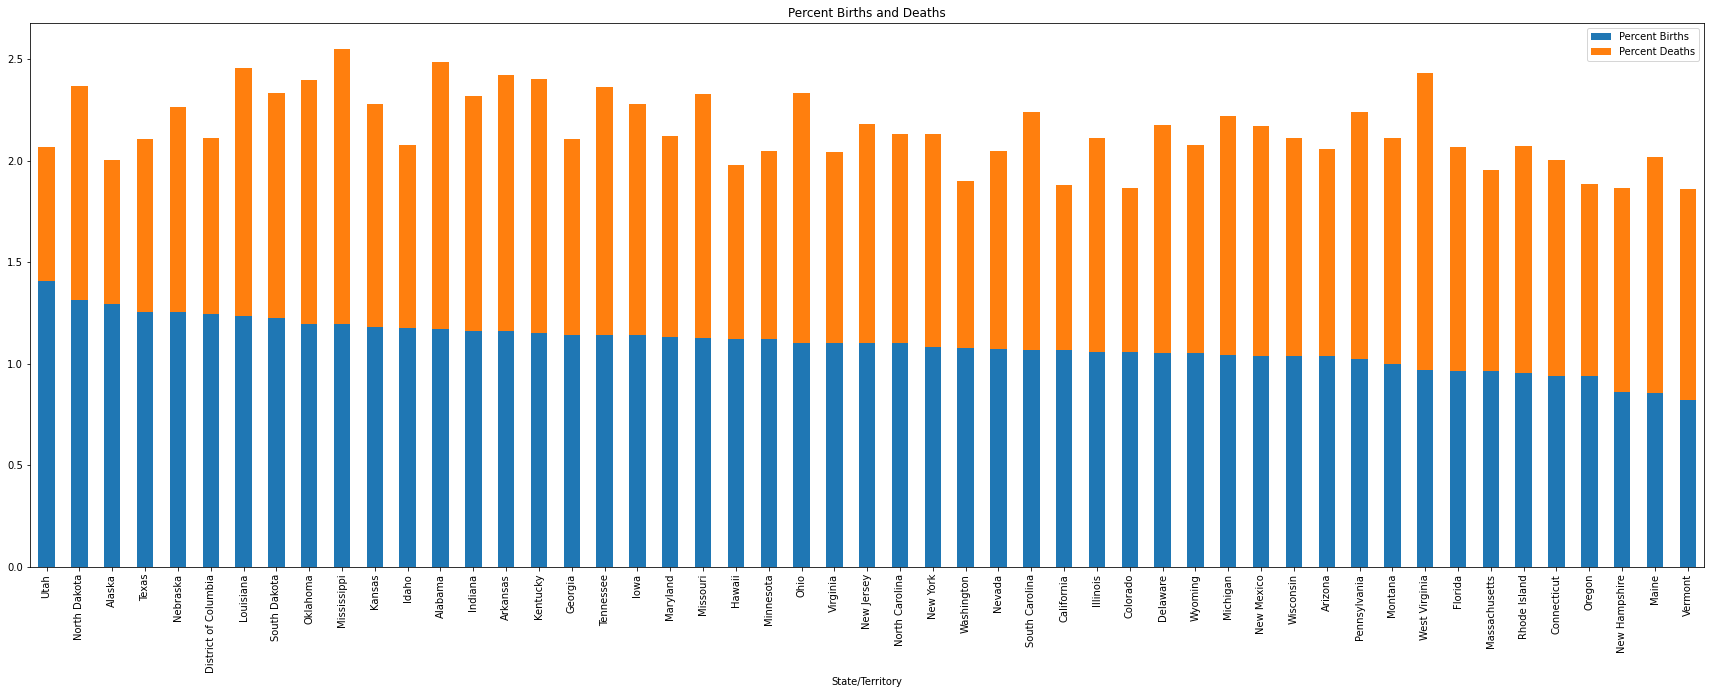

In [151]:
# Choose columns in the order to "stack" them
bdpop[["Percent Births", "Percent Deaths"]].plot(kind="bar", stacked=True)
plt.title("Percent Births and Deaths")
plt.xlabel("State/Territory")

In [153]:
#In which states is the birth percentage more than the death percentage?
print(bdpop[bdpop['Percent Births'] > bdpop['Percent Deaths']])
#interesting to see how this changes the results compared to just plain births vs deaths.

                        Births  Fertility Rate    Deaths  Death Rate  \
Utah                   45702.0            64.1   21497.0       661.5   
North Dakota           10059.0            67.4    8052.0      1052.1   
Alaska                  9469.0            65.7    5170.0       707.1   
Texas                 368190.0            60.2  250339.0       852.6   
Nebraska               24291.0            64.7   19549.0      1009.0   
District of Columbia    8874.0            46.1    6198.0       869.5   
Louisiana              57328.0            62.2   56752.0      1221.7   
South Dakota           10960.0            66.7    9861.0      1104.6   
Kansas                 34376.0            61.1   32060.0      1100.3   
Idaho                  21533.0            60.9   16402.0       897.8   
Indiana                78616.0            59.8   78194.0      1157.6   
Georgia               122473.0            55.7  103075.0       962.4   
Iowa                   36114.0            60.4   35981.0      11

In [154]:
#In which states is the death percentage more than the birth percentage?
print(bdpop[bdpop['Percent Deaths'] > bdpop['Percent Births']])
#interesting to see how this changes the results compared to just plain births vs deaths.

                  Births  Fertility Rate    Deaths  Death Rate  Population  \
Oklahoma         47623.0            61.0   47809.0      1201.0   3980783.0   
Mississippi      35473.0            61.0   40190.0      1354.7   2966786.0   
Alabama          57647.0            60.6   64779.0      1316.2   4921532.0   
Arkansas         35251.0            60.7   38108.0      1257.5   3030522.0   
Kentucky         51668.0            60.8   55880.0      1248.1   4477251.0   
Tennessee        78689.0            58.5   84205.0      1222.7   6886834.0   
Missouri         69285.0            58.7   73887.0      1201.1   6151548.0   
Ohio            129191.0            58.3  143700.0      1228.9  11693217.0   
South Carolina   55704.0            55.9   61223.0      1173.3   5218040.0   
Delaware         10392.0            57.0   11072.0      1122.0    986809.0   
Michigan        104074.0            55.6  117106.0      1175.0   9966555.0   
New Mexico       21903.0            54.6   23807.0      1130.3  